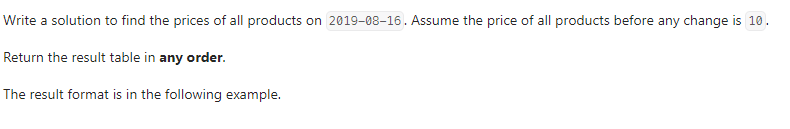

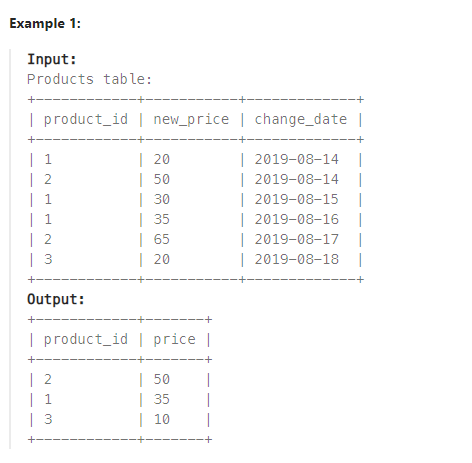

#### Correlated Subquery

    # Write your MySQL query statement below

    Select product_id,
    COALESCE((
        select new_price from Products p2
        where p1.product_id = p2.product_id
        and p2.change_date <= '2019-08-16'
        Order by p2.change_date DESC
        LIMIT 1
    ),10) as price
    FROM (select distinct product_id from Products) p1;

#### Window Function

    with cte as
    (
        select *, Rank() over(partition by product_id Order by change_date DESC)
        as latest_change
        from Products
        where change_date<='2019-08-16'
    )

    select product_id, new_price as price from cte
    where latest_change = 1
    Union 
    select product_id,10 as new_price
    from Products
    where product_id not in (select product_id from cte)